In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from bioservices.kegg import KEGG

In [76]:
k = KEGG()

In [77]:
# Set organism as Saccharomyces cerevisiae (budding yeast)
k.organism = "sce"

In [6]:
# Glycolysis / Gluconeogenesis Pathway
# https://www.genome.jp/dbget-bin/www_bget?sce00010
k.pathwayIds[0]

'path:sce00010'

In [80]:
for Id in k.pathwayIds:
    print(Id)

path:sce00010
path:sce00020
path:sce00030
path:sce00040
path:sce00051
path:sce00052
path:sce00061
path:sce00062
path:sce00071
path:sce00072
path:sce00100
path:sce00130
path:sce00190
path:sce00220
path:sce00230
path:sce00240
path:sce00250
path:sce00260
path:sce00261
path:sce00270
path:sce00280
path:sce00290
path:sce00300
path:sce00310
path:sce00330
path:sce00332
path:sce00340
path:sce00350
path:sce00360
path:sce00380
path:sce00400
path:sce00410
path:sce00430
path:sce00440
path:sce00450
path:sce00460
path:sce00480
path:sce00500
path:sce00510
path:sce00511
path:sce00513
path:sce00514
path:sce00515
path:sce00520
path:sce00561
path:sce00562
path:sce00563
path:sce00564
path:sce00565
path:sce00590
path:sce00592
path:sce00600
path:sce00620
path:sce00630
path:sce00640
path:sce00650
path:sce00660
path:sce00670
path:sce00680
path:sce00730
path:sce00740
path:sce00750
path:sce00760
path:sce00770
path:sce00780
path:sce00785
path:sce00790
path:sce00791
path:sce00860
path:sce00900
path:sce00909
path:s

In [7]:
res = k.parse_kgml_pathway(k.pathwayIds[0])

In [8]:
res.keys()

dict_keys(['relations', 'entries'])

In [9]:
res['relations'][0]

{'entry1': '73',
 'entry2': '75',
 'link': 'ECrel',
 'value': '90',
 'name': 'compound'}

In [10]:
res['entries'][0]

{'id': '18',
 'name': 'sce:YKL060C',
 'type': 'gene',
 'link': 'http://www.kegg.jp/dbget-bin/www_bget?sce:YKL060C',
 'gene_names': 'FBA1, LOT1'}

In [11]:
df_r = pd.DataFrame(res['relations'])
df_e = pd.DataFrame(res['entries'])

In [12]:
df_r.head()

,entry1,entry2,link,value,name
0,73,75,ECrel,90,compound
1,69,73,ECrel,91,compound
2,68,69,ECrel,93,compound
3,69,72,ECrel,93,compound
4,68,72,ECrel,93,compound


In [13]:
# types of links
df_r['link'].unique()

array(['ECrel', 'maplink'], dtype=object)

In [14]:
df_r[df_r['link'] == 'maplink'].head()

,entry1,entry2,link,value,name
39,67,47,maplink,88,compound
40,67,46,maplink,94,compound
41,66,46,maplink,94,compound
42,75,46,maplink,94,compound
43,71,46,maplink,94,compound


In [15]:
df_r.index[df_r['entry1'] == '42']

Int64Index([27, 29, 31], dtype='int64')

In [16]:
df_r.iloc[29]

entry1          42
entry2          50
link         ECrel
value          105
name      compound
Name: 29, dtype: object

In [17]:
len(df_r)

69

In [18]:
df_e.head()

,id,name,type,link,gene_names
0,18,sce:YKL060C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YKL060C,"FBA1, LOT1"
1,42,sce:YER073W sce:YMR110C sce:YOR374W sce:YPL061W,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YER0...,ALD5...
2,43,ko:K01905 ko:K22224,ortholog,http://www.kegg.jp/dbget-bin/www_bget?K01905+K...,K01905...
3,44,sce:YMR169C sce:YMR170C,gene,http://www.kegg.jp/dbget-bin/www_bget?sce:YMR1...,ALD3...
4,45,cpd:C00033,compound,http://www.kegg.jp/dbget-bin/www_bget?C00033,C00033


In [19]:
df_e.index[df_e['id'] == '50']

Int64Index([9], dtype='int64')

In [20]:
df_e.iloc[9]

id                                                           50
name          sce:YBR145W sce:YDL168W sce:YGL256W sce:YMR083...
type                                                       gene
link          http://www.kegg.jp/dbget-bin/www_bget?sce:YBR1...
gene_names                                              ADH5...
Name: 9, dtype: object

In [21]:
df = df_r

In [22]:
G = nx.from_pandas_edgelist(df=df, source='entry1', target='entry2')

In [85]:
df.entry1

0      73
1      69
2      68
3      69
4      68
     ... 
64    140
65    140
66    140
67     80
68     60
Name: entry1, Length: 69, dtype: object

In [86]:
df.entry2

0      75
1      73
2      69
3      72
4      72
     ... 
64     44
65     54
66     58
67    151
68    151
Name: entry2, Length: 69, dtype: object

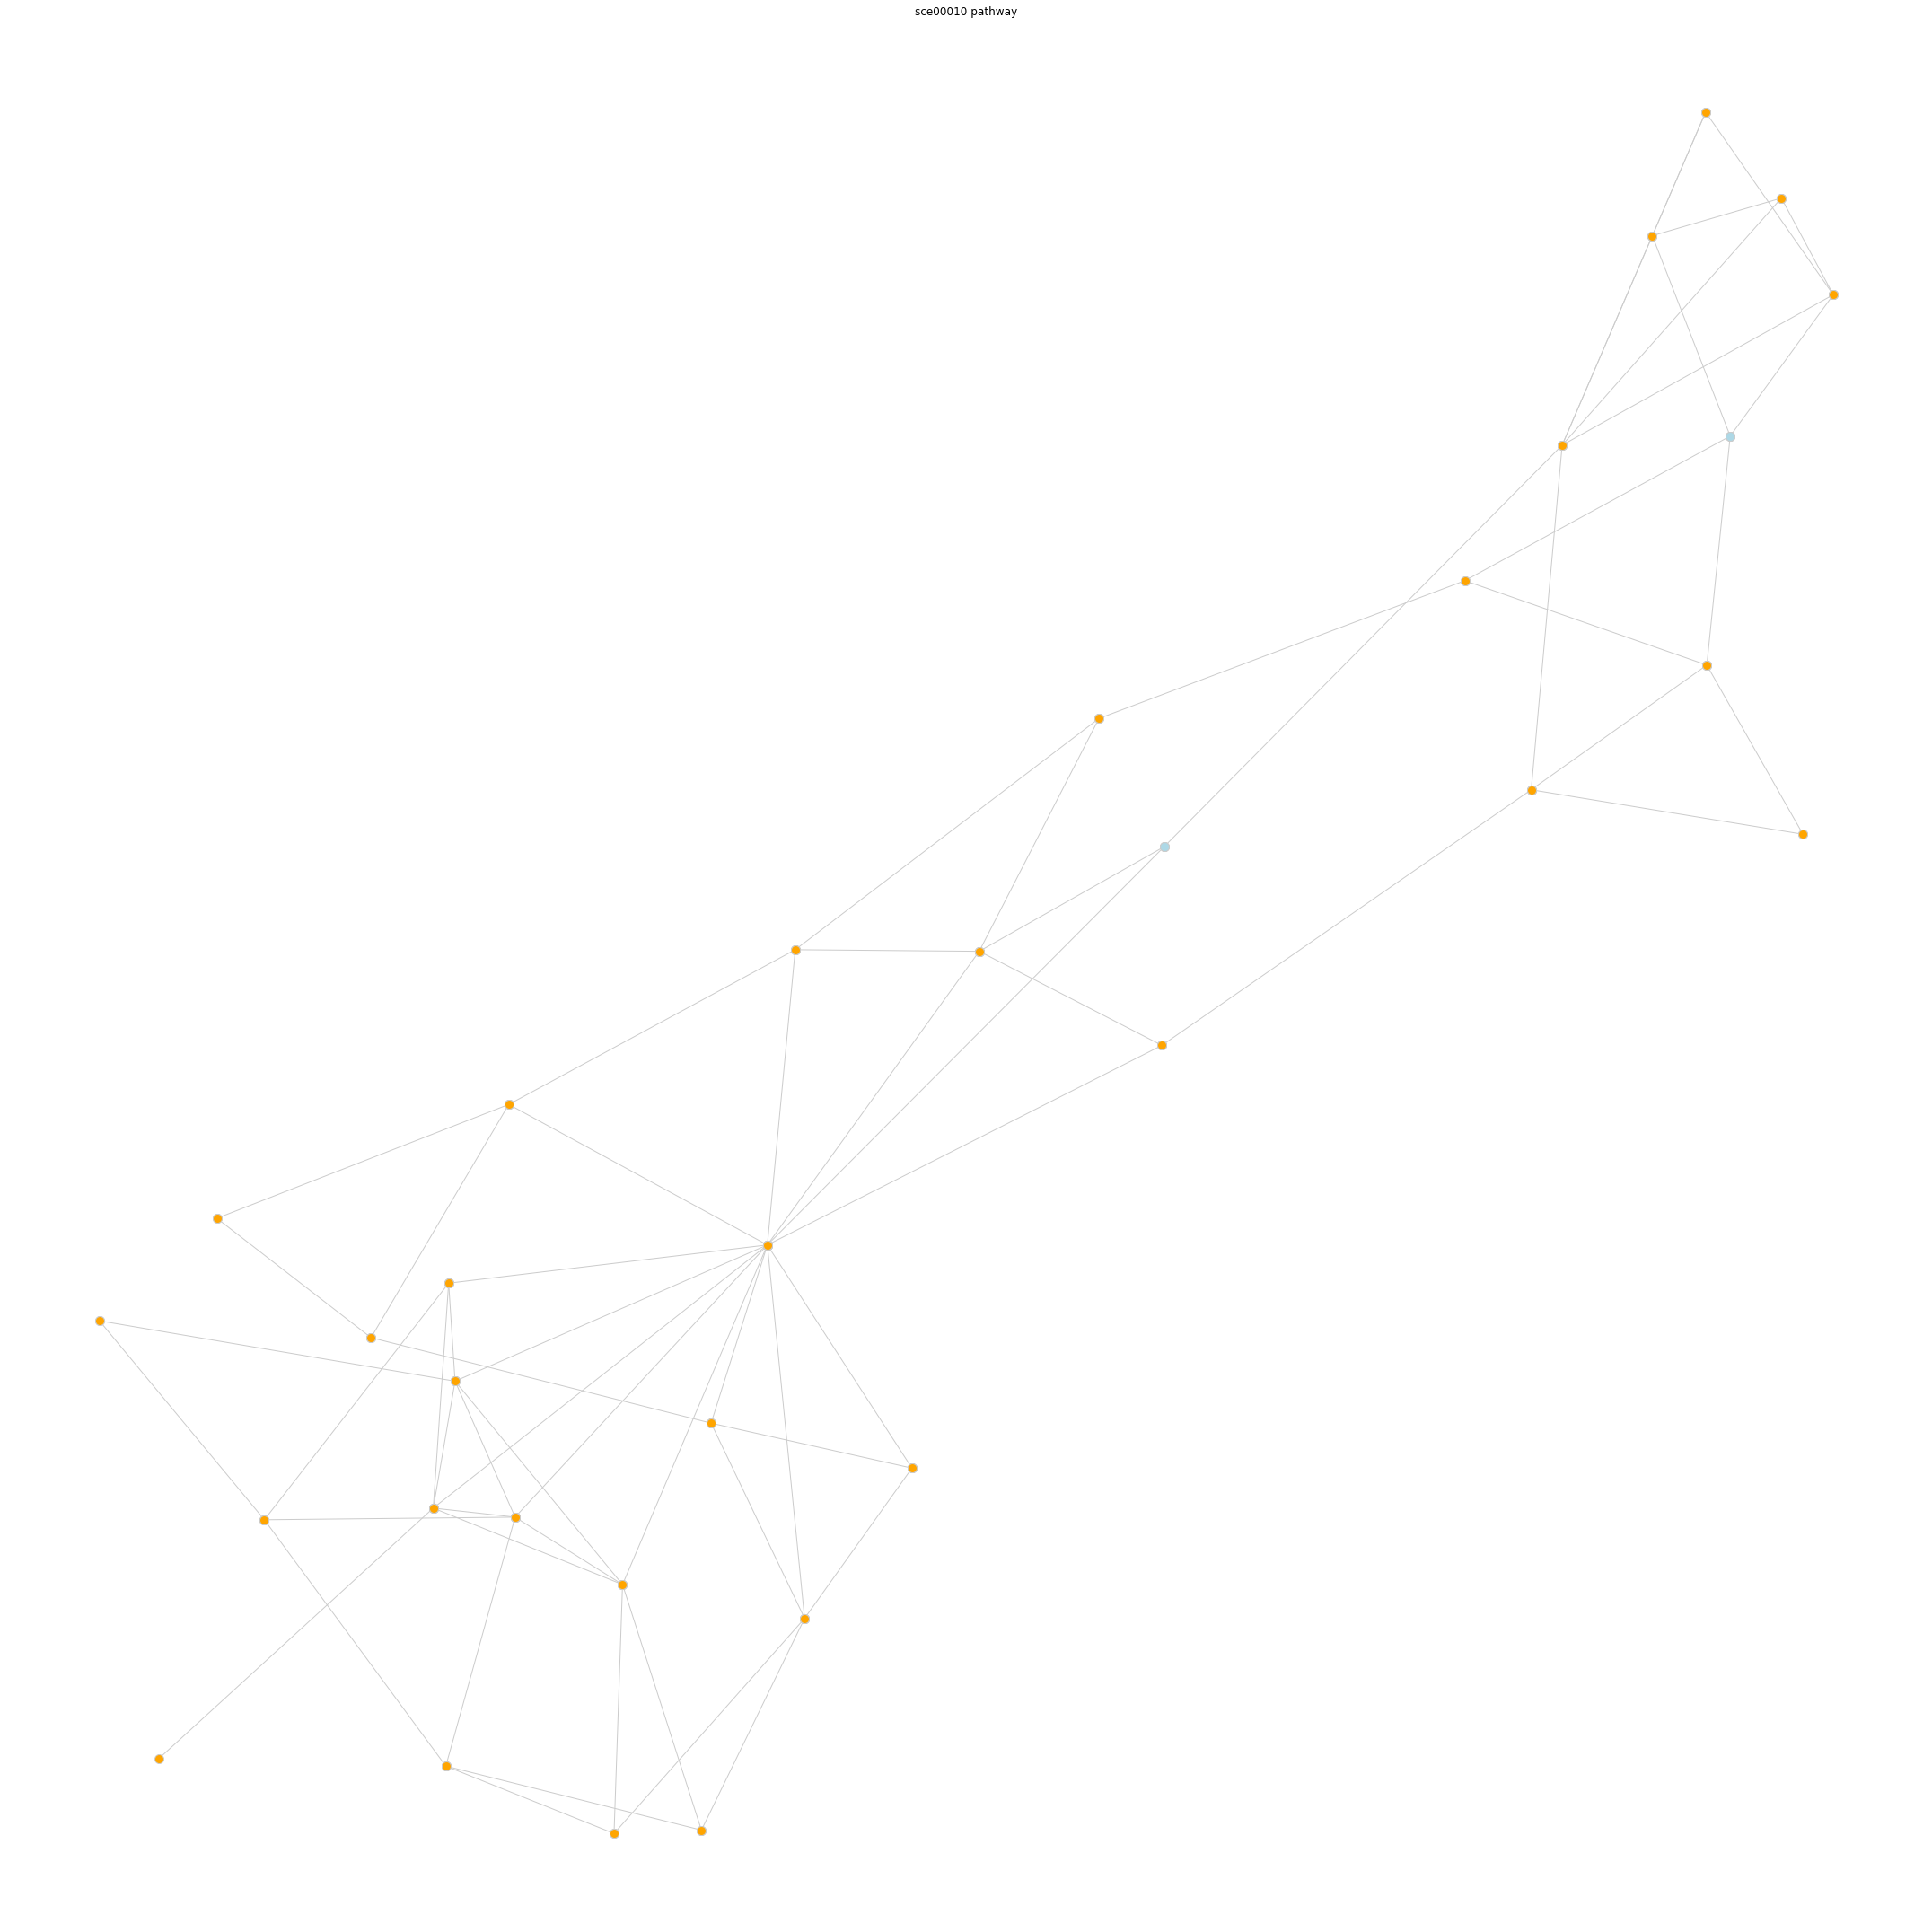

In [87]:
plt.rc('figure', figsize=(30, 30))
k = 5/np.sqrt(G.order())
layout = nx.spring_layout(G, k=0.05, iterations=50, seed=2)
e1 = list(df.entry1.unique())
e2 = list(df.entry2.unique())
nx.draw_networkx_nodes(G, layout, nodelist=e1, node_color='lightblue', node_size=100, edgecolors='#cccccc')
nx.draw_networkx_nodes(G, layout, nodelist=e2, node_color='orange', node_size=100, edgecolors="#cccccc")
nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")
plt.axis('off')
plt.title("sce00010 pathway")
plt.tight_layout()
# plt.savefig('../images/main.png')
plt.show()

## Laplacian

In [24]:
L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes()))
L.todense()

matrix([[ 3,  0,  0, ...,  0,  0,  0],
        [ 0,  4,  0, ...,  0,  0,  0],
        [ 0,  0,  2, ...,  0,  0, -1],
        ...,
        [ 0,  0,  0, ...,  6,  0,  0],
        [ 0,  0,  0, ...,  0,  2,  0],
        [ 0,  0, -1, ...,  0,  0,  3]], dtype=int64)

In [25]:
eig = np.linalg.eig(L.todense())
eig

(array([ 1.41148738e+01, -8.88178420e-16,  7.70566794e+00,  7.67811484e+00,
         7.36829347e+00,  1.91386401e-01,  7.17976706e+00,  6.31706964e+00,
         6.30487355e+00,  6.14867055e+00,  5.76251443e-01,  8.39080938e-01,
         8.64304354e-01,  1.25407121e+00,  1.28924024e+00,  1.64919516e+00,
         1.92581868e+00,  5.53821942e+00,  5.45127180e+00,  5.13314925e+00,
         4.88641667e+00,  2.60538078e+00,  2.68270700e+00,  2.82696544e+00,
         4.48985447e+00,  4.35023509e+00,  4.20500351e+00,  3.69310738e+00,
         3.40862610e+00,  3.32238381e+00,  4.00000000e+00,  3.00000000e+00,
         3.00000000e+00]),
 matrix([[ 1.44473158e-02,  1.74077656e-01, -2.77686255e-03, ...,
           1.13221662e-15, -2.55015011e-16,  6.81136820e-17],
         [ 3.42491716e-04,  1.74077656e-01, -1.44948613e-03, ...,
           8.18250080e-16,  3.88908008e-16, -2.73581957e-16],
         [ 6.10725142e-03,  1.74077656e-01, -5.50782586e-04, ...,
           1.18152023e-15, -8.04184135e-16,

In [26]:
eig[0].shape

(33,)

In [27]:
# the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
eig[1].shape

(33, 33)

In [28]:
# example: the first eigen vector
eig[1][:,0]

matrix([[ 1.44473158e-02],
        [ 3.42491716e-04],
        [ 6.10725142e-03],
        [-9.17718847e-02],
        [-8.17025177e-04],
        [-8.17025177e-04],
        [ 9.54428129e-01],
        [ 5.83893794e-03],
        [ 9.30124217e-03],
        [-6.89813663e-04],
        [-6.89813663e-04],
        [-7.92861828e-02],
        [-7.94908724e-02],
        [ 7.02614358e-03],
        [-5.48968505e-04],
        [-8.01983561e-02],
        [-1.28124163e-03],
        [-7.91004942e-02],
        [-8.85855716e-02],
        [-7.97653957e-02],
        [-7.04363237e-02],
        [ 1.61313692e-02],
        [ 1.61313692e-02],
        [-9.16485761e-02],
        [-7.65769343e-02],
        [ 4.12232755e-03],
        [ 1.59798386e-02],
        [-8.08090289e-02],
        [-8.99394000e-02],
        [ 4.99205078e-03],
        [-7.64579038e-02],
        [-5.34646516e-04],
        [ 1.45969913e-02]])

In [29]:
G.number_of_nodes()

33

## graph with 1st, 2nd, 3rd smallest eigenvalues and largest eigenvalues

## 1st smallest 

In [30]:
# Find the index of the smallest eigenvalue
i_min = np.argmin(eig[0])
i_min

1

In [31]:
# Find the smallest entry of the eigenvalues
# the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
v0 = eig[1][:, i_min].T.tolist()[0]
v0

[0.17407765595569805,
 0.17407765595569807,
 0.1740776559556984,
 0.1740776559556976,
 0.17407765595569846,
 0.17407765595569888,
 0.1740776559556976,
 0.17407765595569777,
 0.1740776559556983,
 0.17407765595569846,
 0.1740776559556985,
 0.17407765595569755,
 0.17407765595569752,
 0.17407765595569774,
 0.1740776559556981,
 0.1740776559556977,
 0.174077655955698,
 0.17407765595569766,
 0.17407765595569802,
 0.1740776559556975,
 0.1740776559556974,
 0.17407765595569746,
 0.17407765595569732,
 0.17407765595569774,
 0.17407765595569766,
 0.1740776559556976,
 0.17407765595569755,
 0.17407765595569769,
 0.17407765595569746,
 0.17407765595569769,
 0.17407765595569735,
 0.17407765595569807,
 0.17407765595569769]

In [32]:
# create the colormap. 
# https://matplotlib.org/gallery/images_contours_and_fields/custom_cmap.html
# positive: red
# negative: green
# absolute value: intensity of the color

from matplotlib.colors import LinearSegmentedColormap, DivergingNorm

# cdict = {'red':   ((0.0, 0.0, 0.0),
#                    (0.5, 0.0, 0.1),
#                    (1.0, 1.0, 1.0)),

#          'blue': ((0.0, 0.0, 0.0),
#                    (1.0, 0.0, 0.0)),

#          'green':  ((0.0, 0.0, 1.0),
#                    (0.5, 0.1, 0.0),
#                    (1.0, 0.0, 0.0))
#         }
# ccmap = LinearSegmentedColormap('redGreen', cdict)

In [83]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [55]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

In [56]:
vmin, vmax = change_scale(eig)

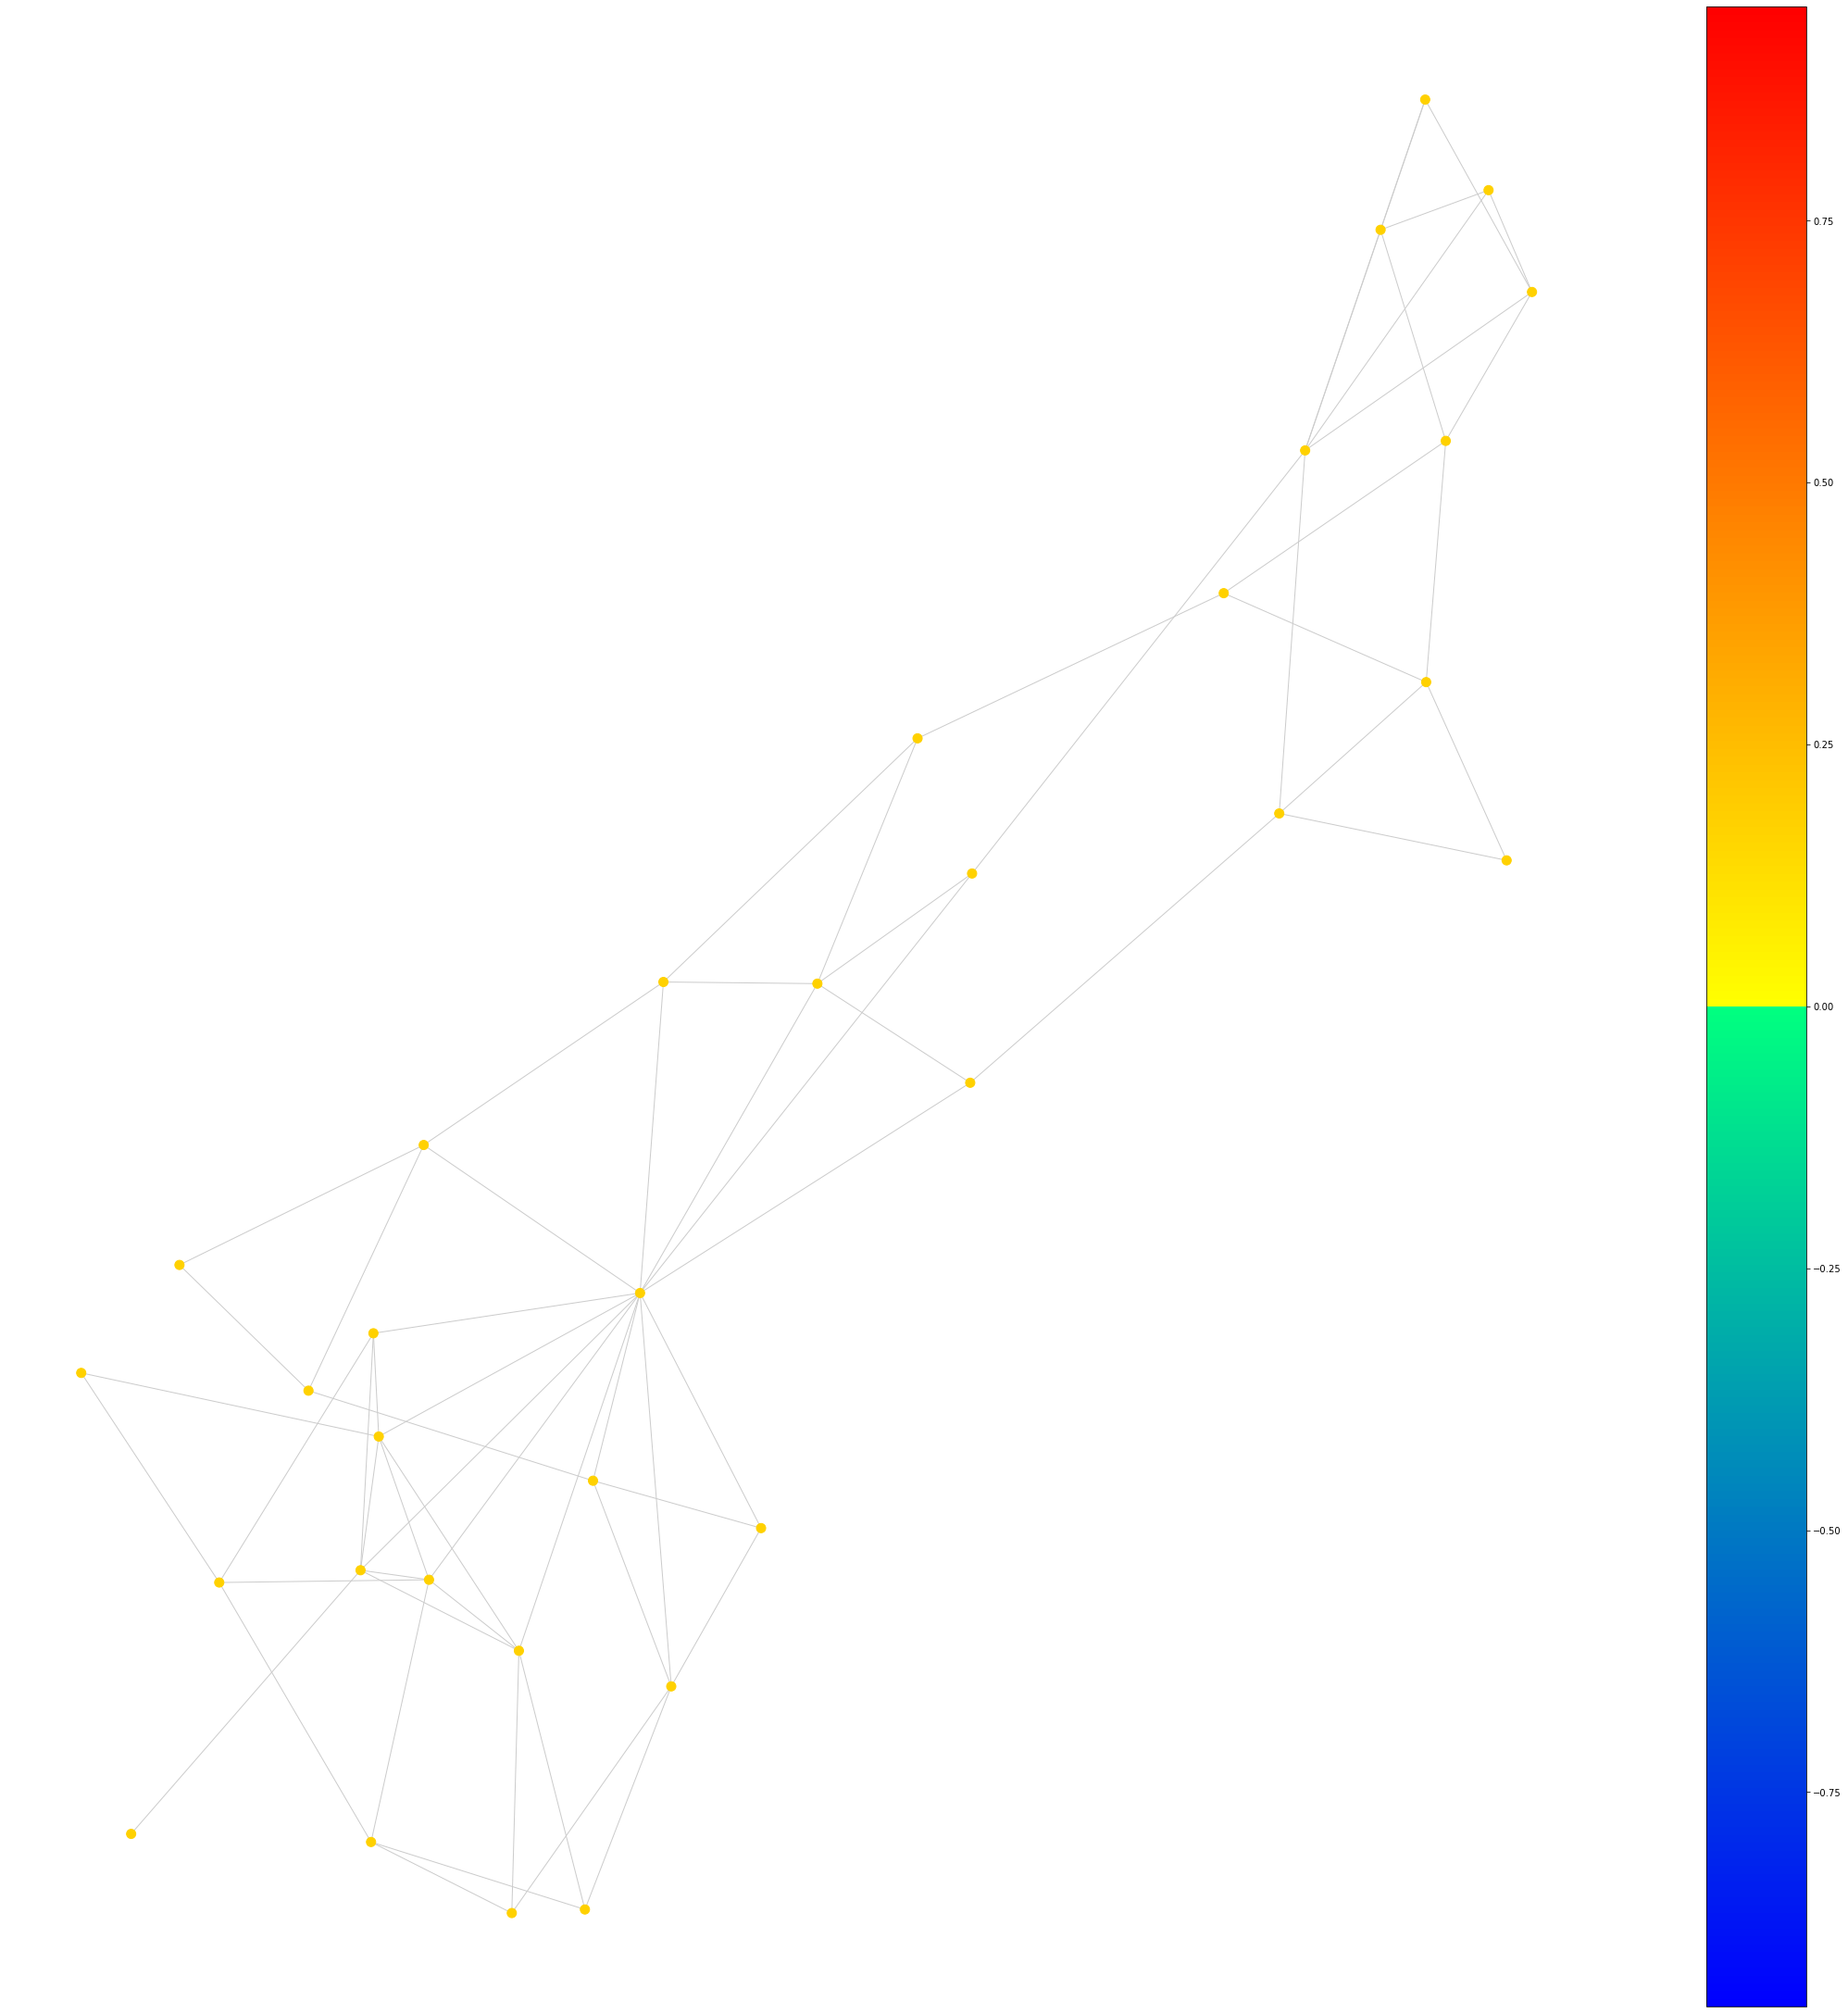

In [84]:
# node_color is the coefficient of eigenvectors 
nx.draw(G, layout, node_size=100, node_color=v0, edge_color="#cccccc", cmap=ccmap, vmin=vmin, vmax=vmax)
plt.axis('off')
# plt.savefig('../images/laplacian.png')
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
plt.colorbar(sm)
plt.show()

## 2nd smallest

In [58]:
# Find the index of the 2nd smallest eigenvalue
i_1min = np.argpartition(eig[0], 1)[1]

In [59]:
v1 = eig[1][:, i_1min].T.tolist()[0]
v1

[0.06070425292594201,
 0.2560849827470208,
 -0.1192205110376428,
 -0.138521263736721,
 0.27467248138624756,
 0.27467248138624734,
 -0.09049819972001016,
 -0.18485458089152906,
 0.23296048445550097,
 0.27853794037055485,
 0.2785379403705549,
 0.03906684483612884,
 0.0530392791488077,
 0.1937173154304767,
 0.23095926988434926,
 0.0065045559755388185,
 0.1950245151936387,
 -0.031034280869899546,
 -0.09490819334508732,
 -0.124914895629547,
 -0.12601746255965,
 -0.16233233733929028,
 -0.16233233733929037,
 -0.14857002414584178,
 -0.14947592799000864,
 -0.16883752236437582,
 -0.16801249044097794,
 -0.14597804302004463,
 -0.15035971861875824,
 -0.17471937193188106,
 -0.14798734168504005,
 0.2348078027800739,
 -0.12071564422549003]

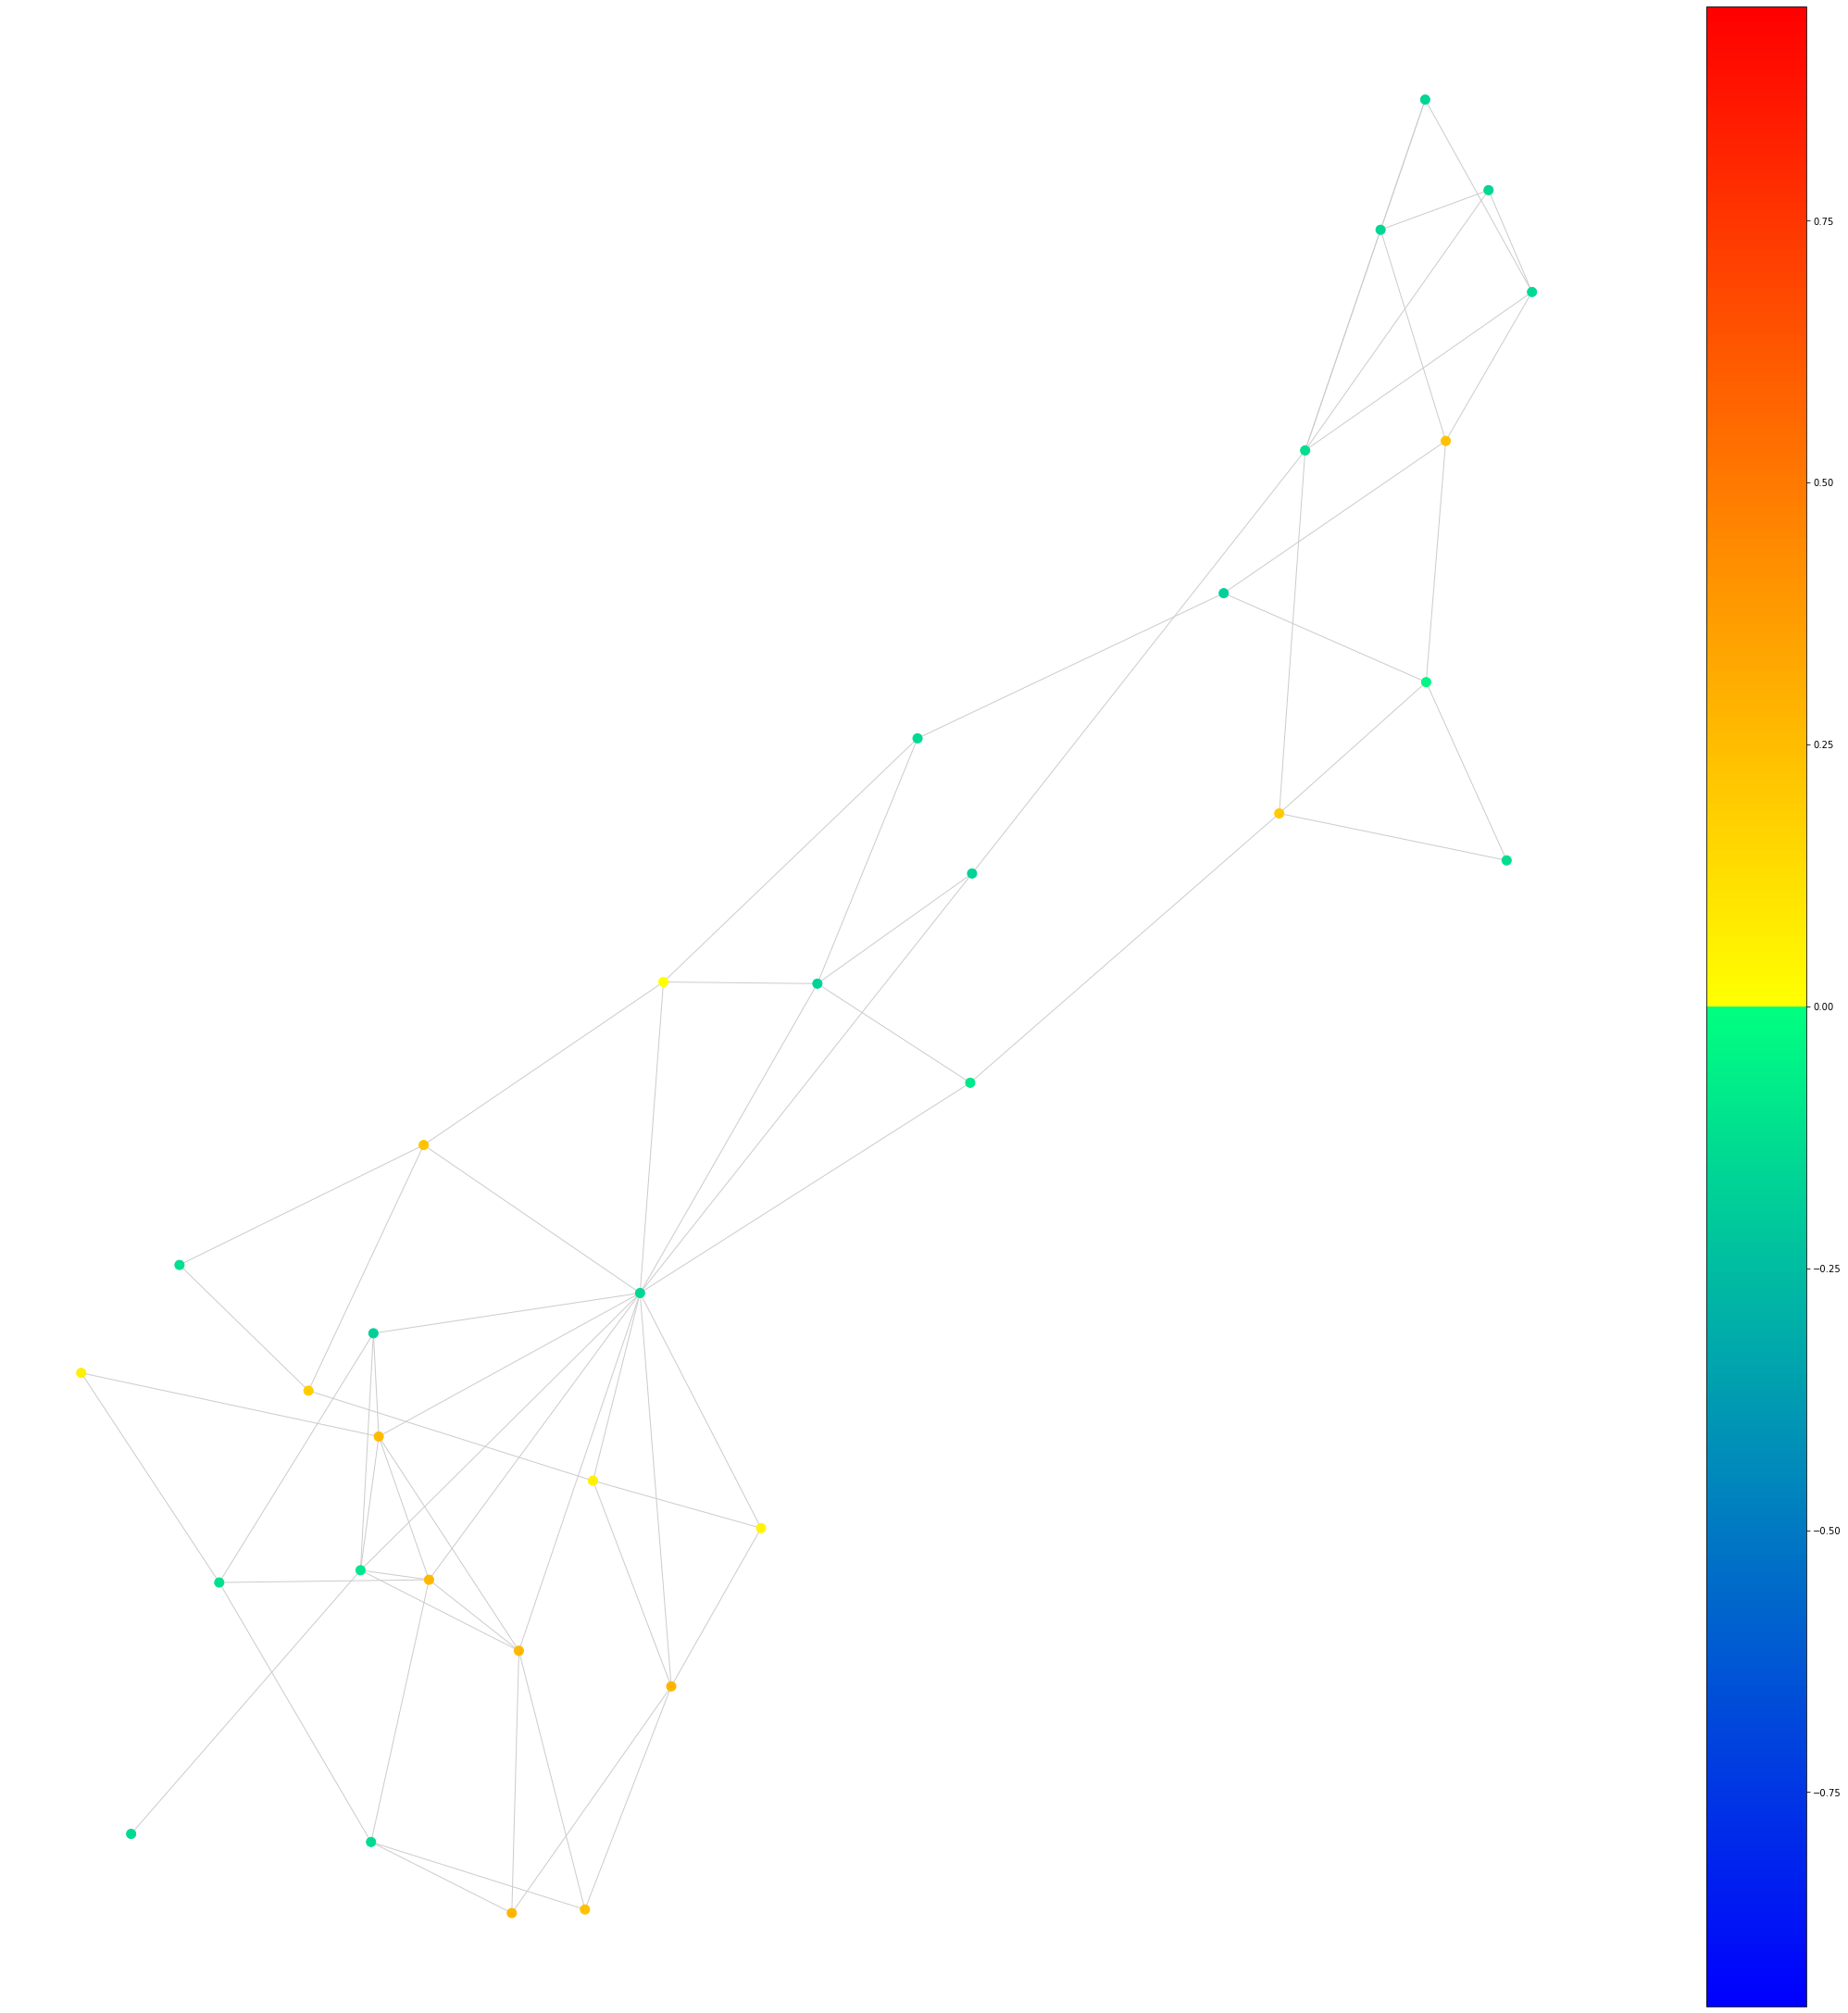

In [60]:
# node_color is the coefficient of eigenvectors 
nx.draw(G, layout, node_size=100, node_color=v1, edge_color="#cccccc", cmap=ccmap, vmin=vmin, vmax=vmax)
plt.axis('off')
# plt.savefig('../images/laplacian.png')
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
plt.colorbar(sm)
plt.show()

## 3rd smallest

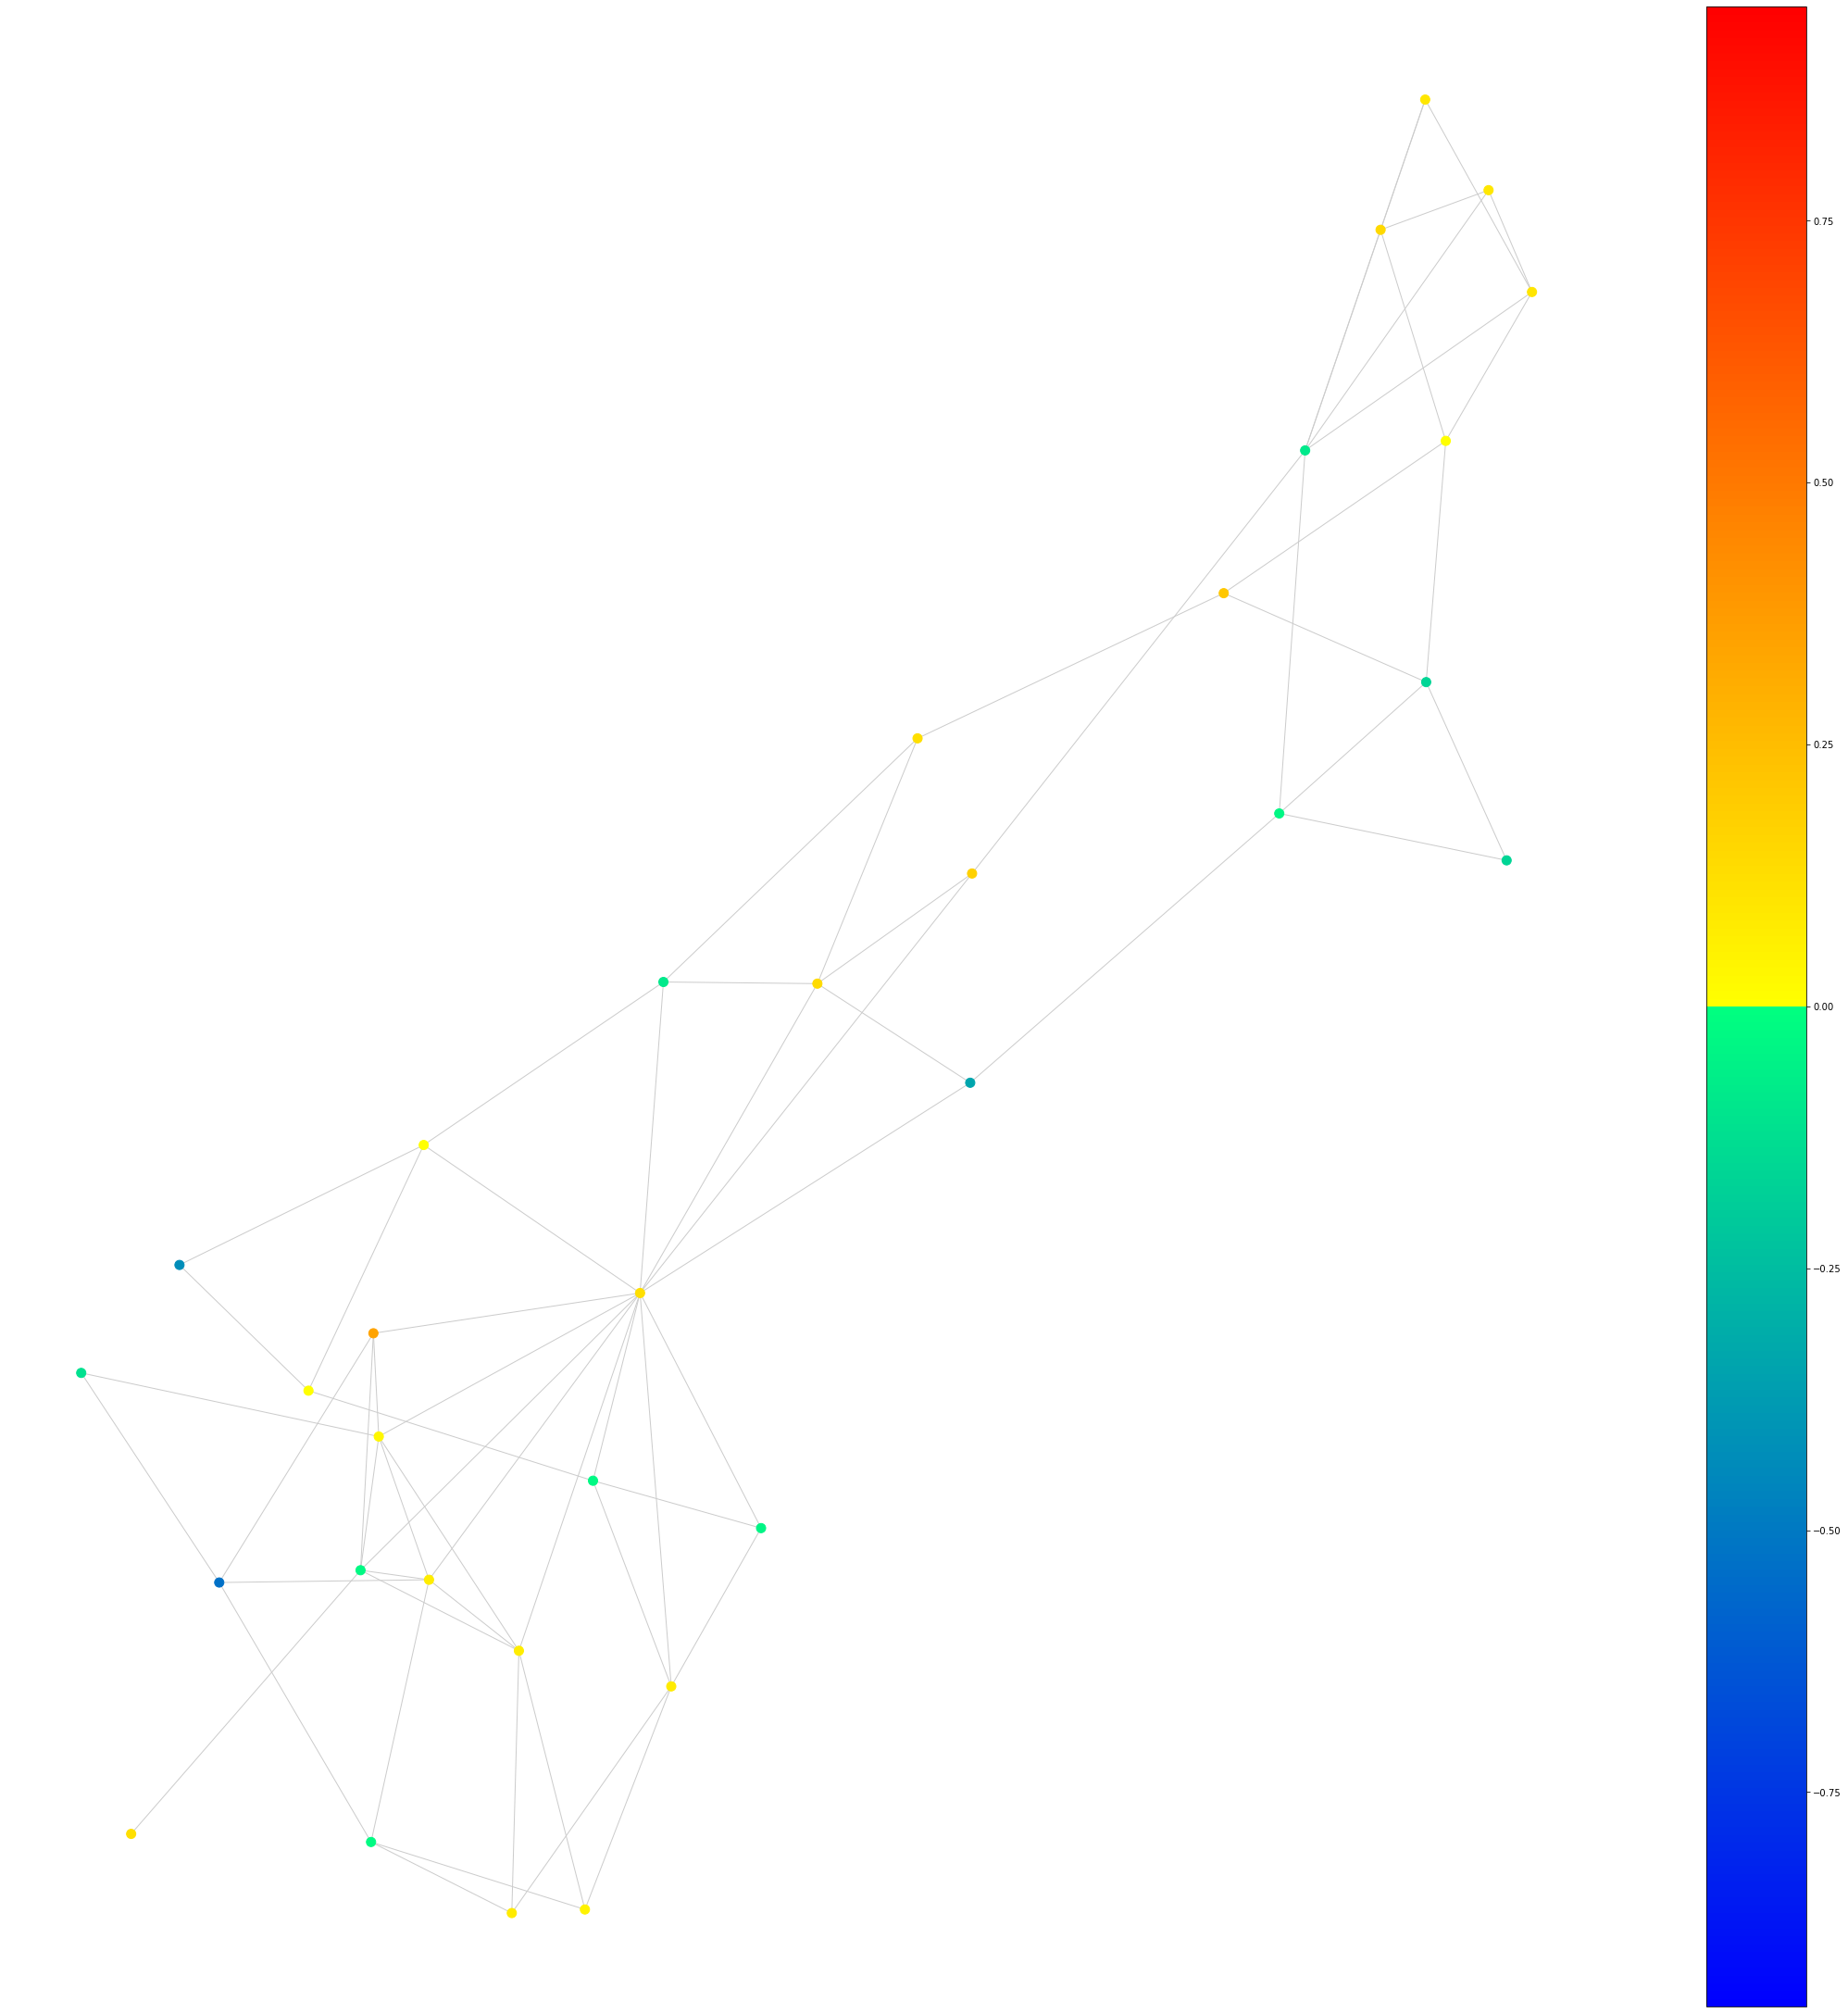

In [61]:
i_3min = np.argpartition(eig[0], 2)[2]
v2 = eig[1][:, i_3min].T.tolist()[0]
# node_color is the coefficient of eigenvectors 
nx.draw(G, layout, node_size=100, node_color=v2, edge_color="#cccccc", cmap=ccmap, vmin=vmin, vmax=vmax)
plt.axis('off')
# plt.savefig('../images/laplacian.png')
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
plt.colorbar(sm)
plt.show()

## largest

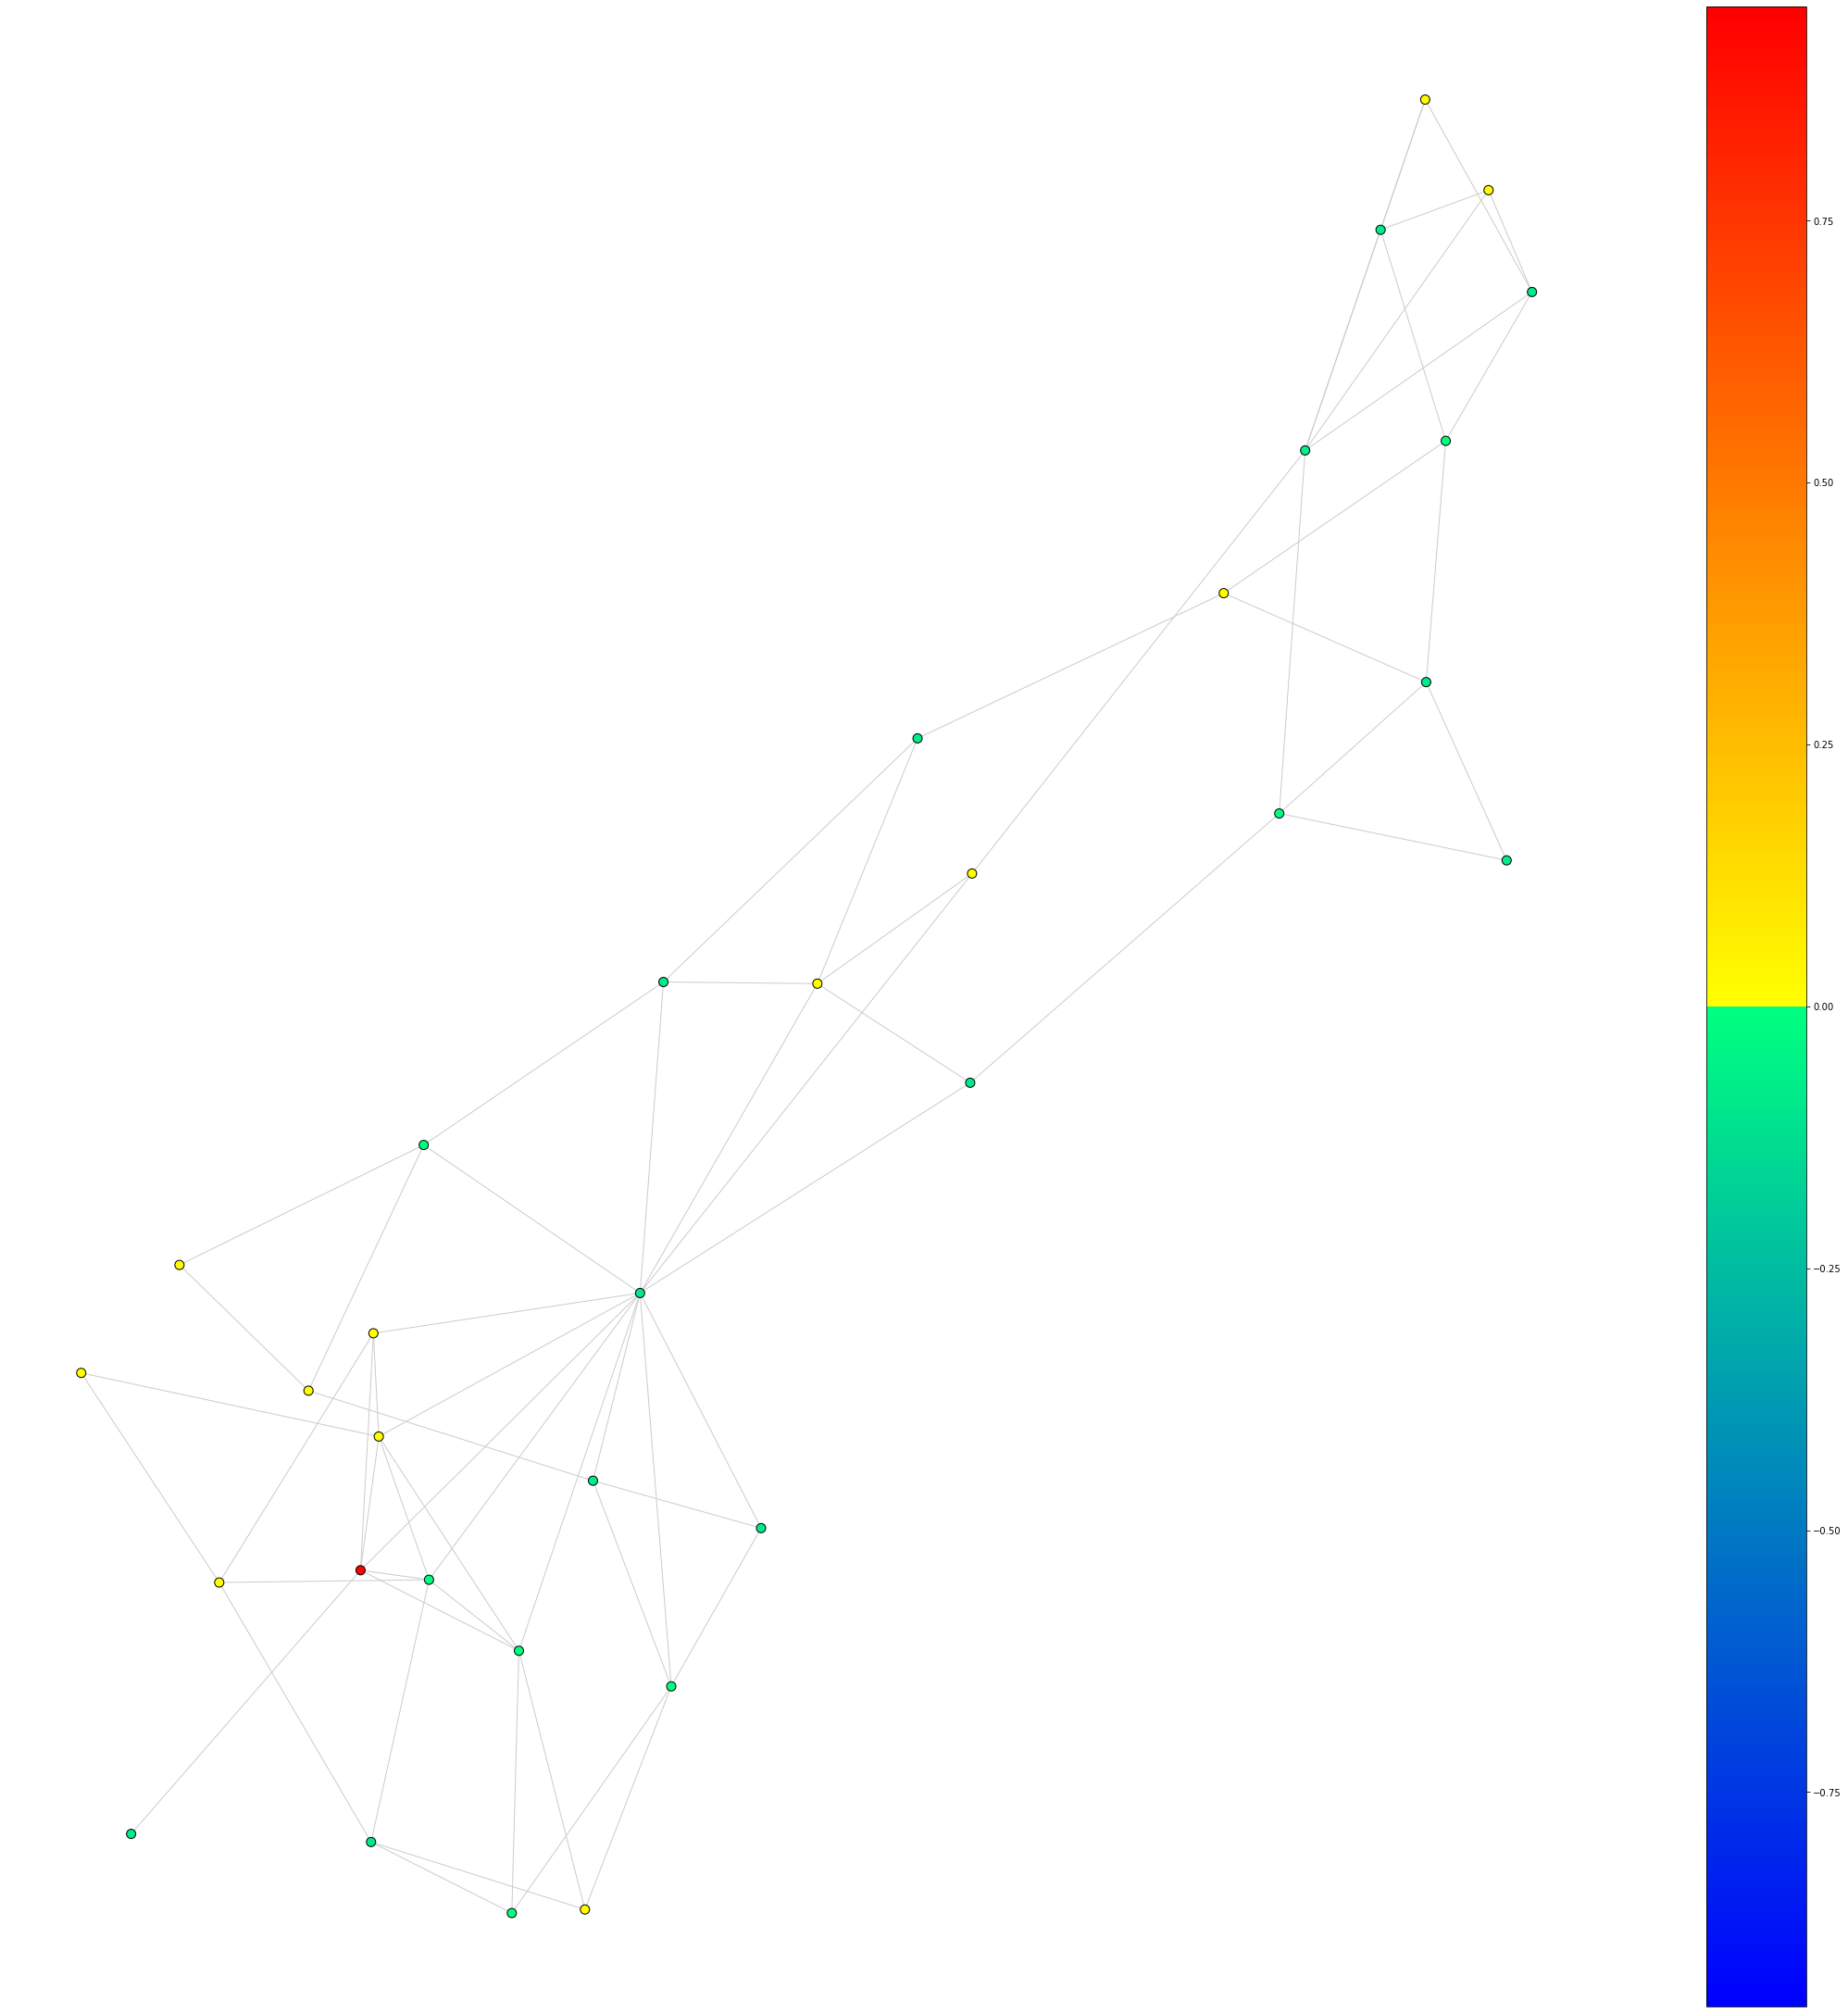

In [93]:
i_max = np.argmax(eig[0])
v3 = eig[1][:, i_max].T.tolist()[0]
# node_color is the coefficient of eigenvectors 
nx.draw(G, layout, node_size=100, node_color=v3, edge_color="#cccccc", cmap=ccmap, vmin=vmin, vmax=vmax, edgecolors='#000000')
plt.axis('off')
# plt.savefig('../images/laplacian.png')
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
plt.colorbar(sm)
plt.show()

## Use Subplots 

In [90]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1][:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm)

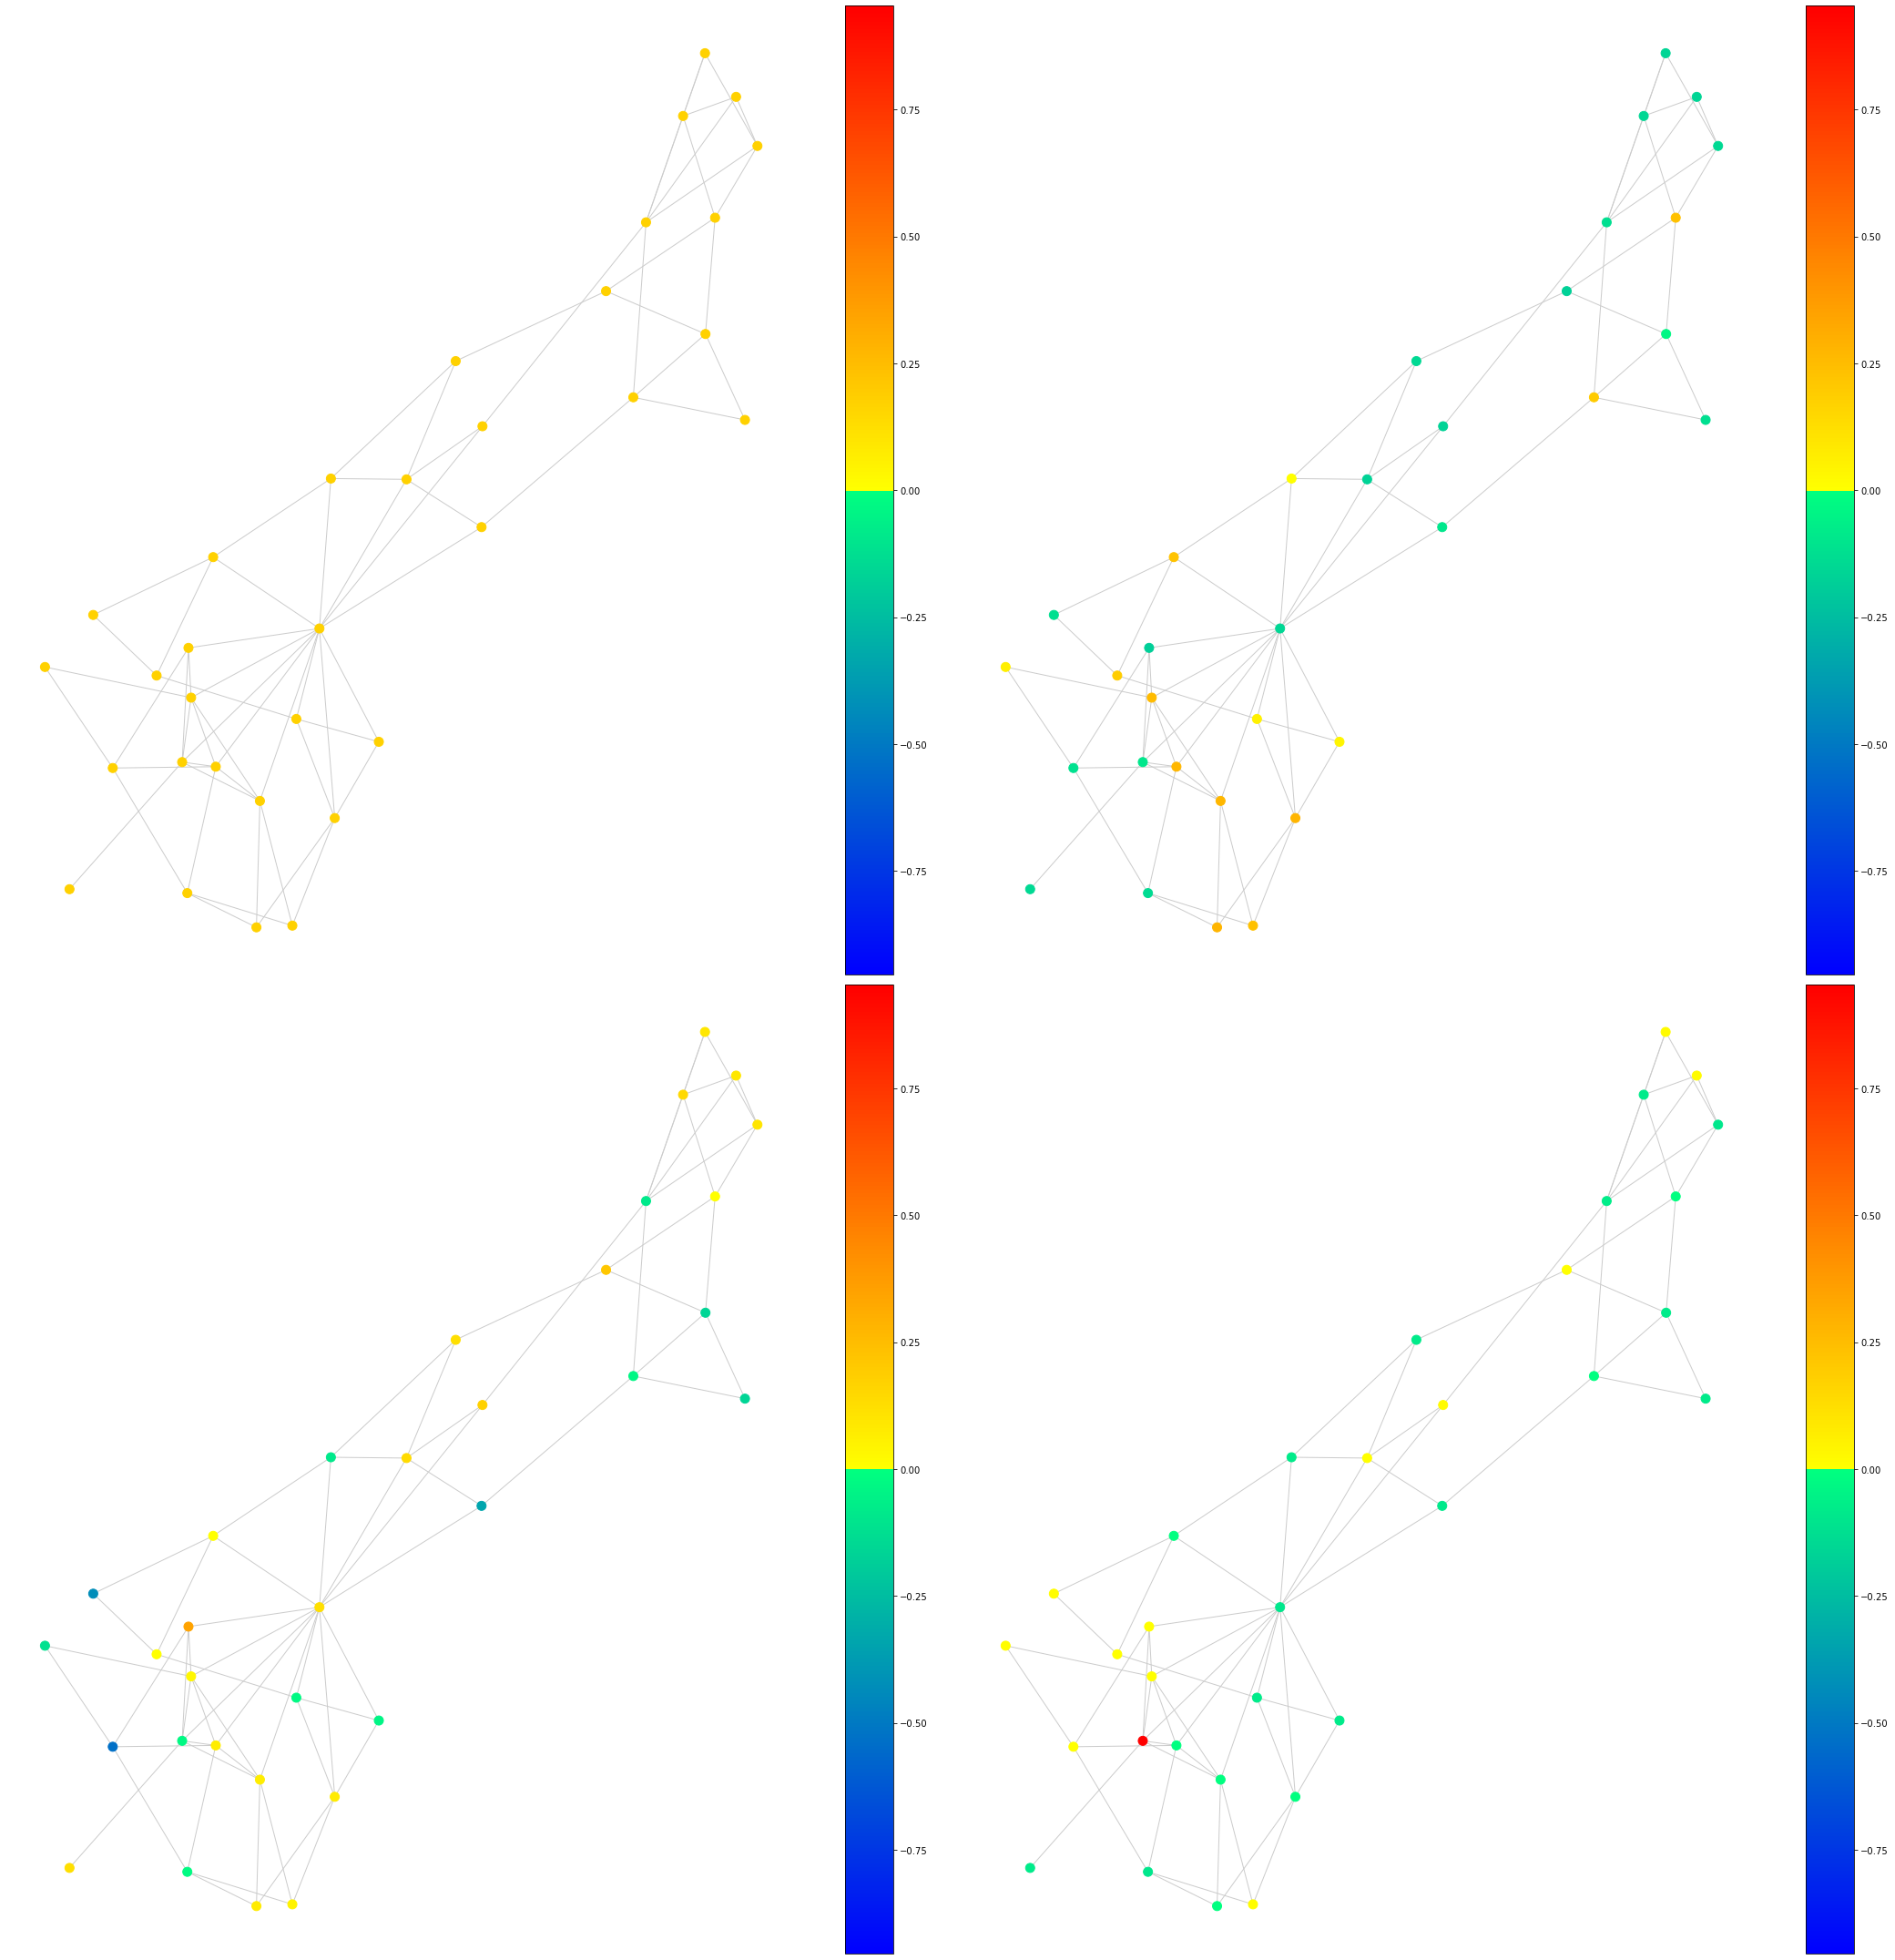

In [91]:
k_lst = [0, 1, 2, len(eig[0])-1]
vmin, vmax = change_scale(eig)
for i, k in enumerate(k_lst):
    plt.subplot(2,2,i+1)
    draw_sub(k, eig, G, layout, ccmap, vmin, vmax)
plt.tight_layout()
plt.show()